In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [18]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

font_location = r'H2HDRM.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [2]:
all_data = pd.read_csv( r'OSSP_final_data_filled_with_knn_with_LABEL.csv', encoding = 'cp949' )
all_data = all_data.drop(['Unnamed: 0'], axis=1)
all_data

,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,상권코드_7,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59
1,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03
2,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08
3,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11
4,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56
32908,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00
32909,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49
32910,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00


In [3]:
from xgboost import plot_importance
from xgboost import XGBClassifier


y = all_data['폐업률']
x = all_data.drop('폐업률',axis=1)

In [4]:
from sklearn.model_selection import train_test_split

# 평균값으로 결측치 채우기, 중앙값으로 결측치 채우기, KNN으로 결측치 채우기 가운데 어떤 방법이 가장 RMSE가 낮은지 비교한다.
# 1. KNN

X_train, X_test, y_train, y_test = train_test_split(all_data.loc[:,'기준_년_코드':'총_직장_인구_수'], all_data[['폐업률']], test_size=0.2, random_state=42)

In [5]:
xgb = XGBClassifier(n_estimators=50, learning_rate=0.1 , max_depth=4, n_jobs = -1)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
# 8:14 pm start 약 2시간 걸림

In [6]:
# metrics(y_test, xgb_pred)

NameError: name 'metrics' is not defined

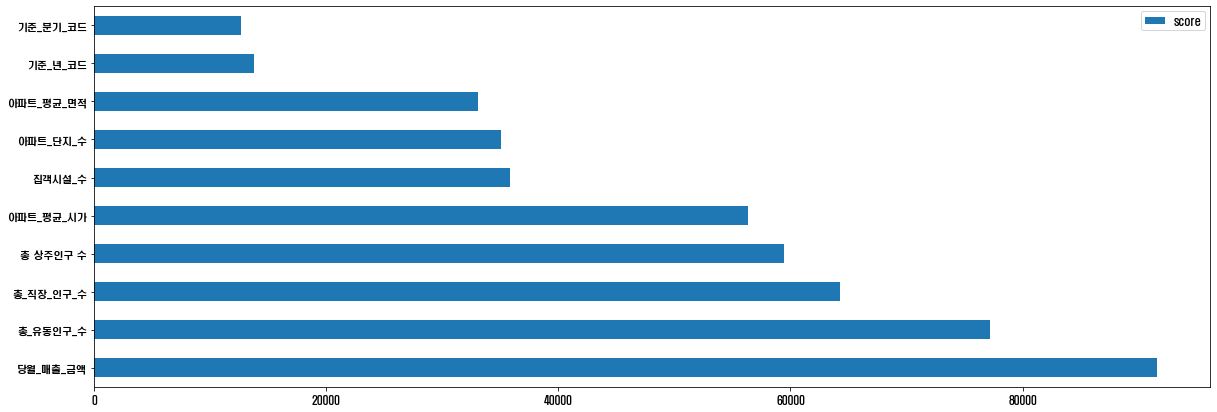

In [25]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')